# Fashion MNIST

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms

In [15]:
# Transformations: Normalize and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [16]:
# Download and load the dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

In [17]:

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, img_channels=1):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(img_channels, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten dynamically
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Training

In [23]:
import torch.optim as optim

In [24]:
# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/5, Loss: 0.4694
Epoch 2/5, Loss: 0.3048
Epoch 3/5, Loss: 0.2639
Epoch 4/5, Loss: 0.2362
Epoch 5/5, Loss: 0.2129


### Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score

In [27]:

model.eval()  # Set model to evaluation mode
all_preds = []
all_labels = []

In [28]:
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

In [29]:
# Compute accuracy
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9070


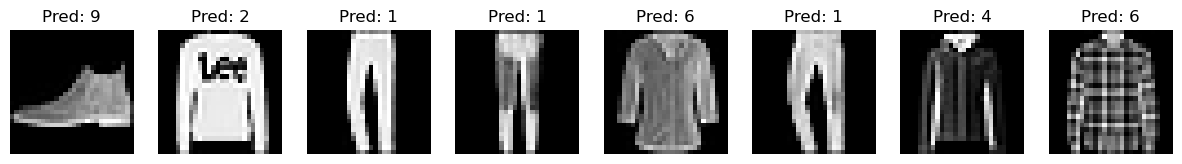

In [30]:
import matplotlib.pyplot as plt

# Get some test data and predictions
model.eval()
with torch.no_grad():
    test_images, test_labels = next(iter(test_loader))
    predictions = model(test_images)
    _, preds = torch.max(predictions, 1)

# Visualize the first 8 test samples
fig, axes = plt.subplots(1, 8, figsize=(15, 4))
for idx in range(8):
    axes[idx].imshow(test_images[idx].squeeze(), cmap='gray')
    axes[idx].set_title(f"Pred: {preds[idx].item()}")
    axes[idx].axis('off')
plt.show()
